# Configurações Iniciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

### Carregando a base e Selecionando as variáveis

In [2]:
#carregando a base gerada
df = pd.read_csv('clientes_investimentos_melhorados.csv')
df.head()

,Perfil,Valor_Investido,Frequencia_Operacoes,%_Renda_Fixa,%_Acoes,%_Cripto
0,conservador,54967.141530,4,88.238443,2.071816,9.689741
1,conservador,47658.630431,9,88.837174,0.854250,10.308577
2,conservador,45365.823072,3,86.209811,0.059794,13.730395
3,conservador,44377.124708,1,86.571237,0.733194,12.695569
4,conservador,64656.487689,4,85.337641,0.421727,14.240632


In [3]:
# Selecionar variáveis para clustering
X = df[['Valor_Investido', 'Frequencia_Operacoes', '%_Renda_Fixa', '%_Acoes', '%_Cripto']]

### Normalizando os dados

In [4]:
# Normalizar os dados
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

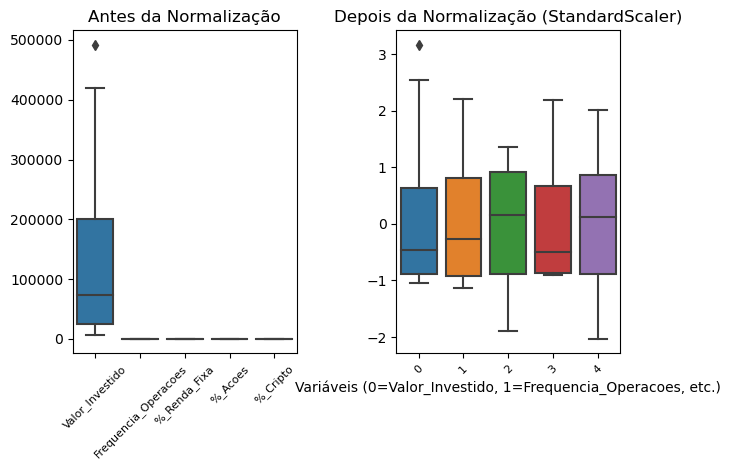

In [5]:
# Gráfico ANTES da normalização
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title("Antes da Normalização")
plt.xticks(rotation=45, fontsize=8)

# Gráfico DEPOIS da normalização
plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalizado)
plt.title("Depois da Normalização (StandardScaler)")
plt.xticks(rotation=45, fontsize=8)
plt.xlabel("Variáveis (0=Valor_Investido, 1=Frequencia_Operacoes, etc.)")

plt.tight_layout(w_pad=5)  
plt.show()

# Definindo o número de clusters

### Método do Cotovelo 

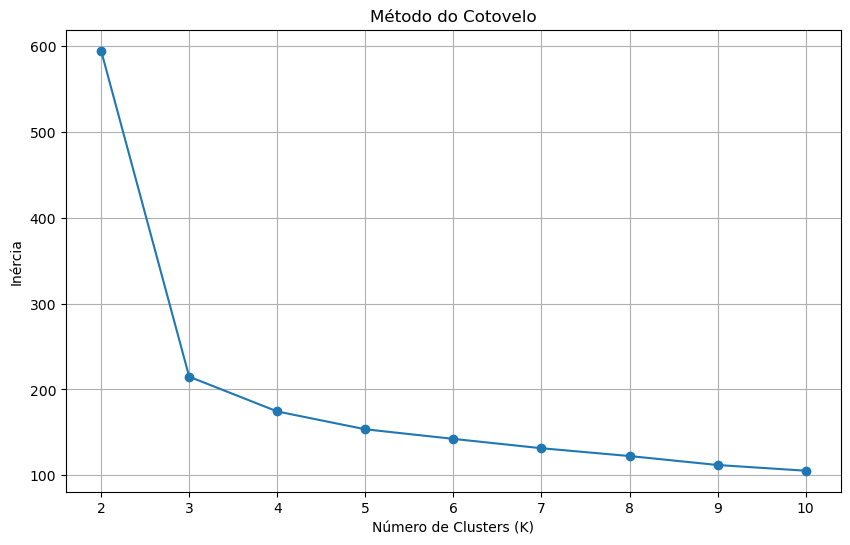

In [6]:
inercia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_normalizado)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inercia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid()
plt.show()

### Silhouette Score

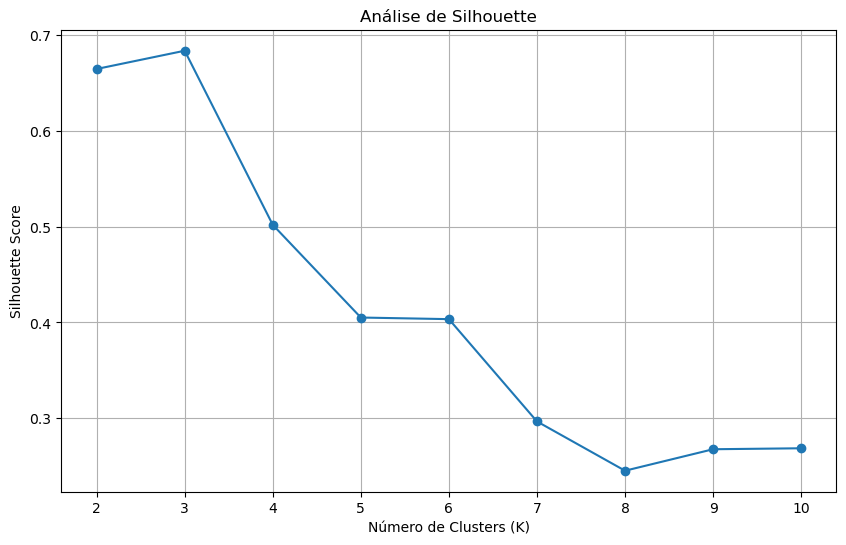

In [7]:
# Análise de Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_normalizado)
    score = silhouette_score(X_normalizado, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Análise de Silhouette')
plt.grid()
plt.show()

### Aplicando o K-Means

In [9]:
# Aplicando K-Means com o melhor K
melhor_k = np.argmax(silhouette_scores) + 2 
kmeans = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_normalizado)

### Visualizando com PCA

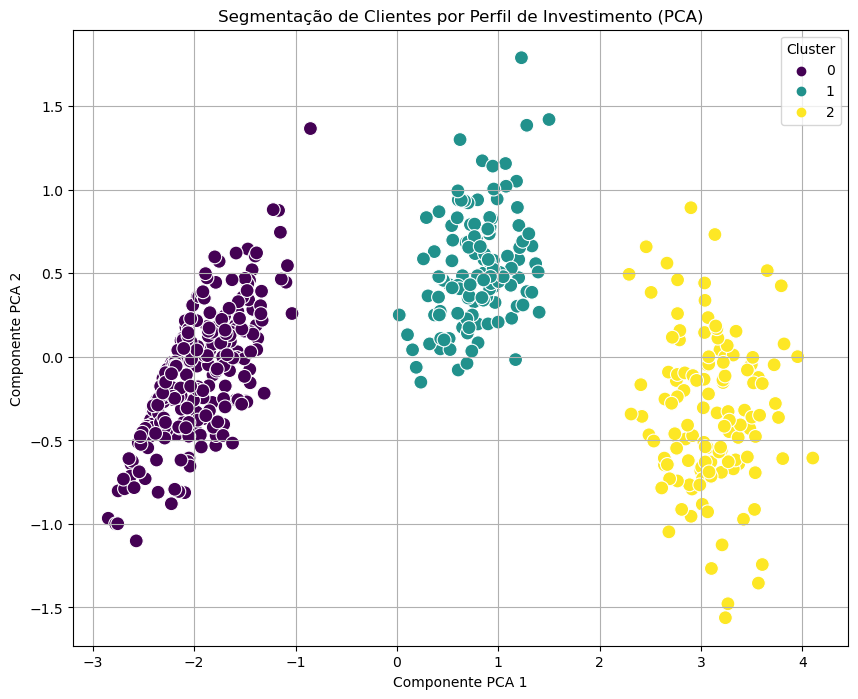

In [10]:
# Visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalizado)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Segmentação de Clientes por Perfil de Investimento (PCA)')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

### Análise dos clusters

In [11]:
# Análise dos clusters
analise = df.groupby('Cluster').agg({
    'Valor_Investido': 'mean',
    'Frequencia_Operacoes': 'mean',
    '%_Renda_Fixa': 'mean',
    '%_Acoes': 'mean',
    '%_Cripto': 'mean'
}).round(2)

print(analise)

         Valor_Investido  Frequencia_Operacoes  %_Renda_Fixa  %_Acoes  \
Cluster                                                                 
0               29994.12                  3.54         87.16     1.07   
1              152436.35                 14.11         50.47    19.96   
2              296019.50                 24.81         20.66    47.52   

         %_Cripto  
Cluster            
0           11.77  
1           29.57  
2           31.82  
